# Параллельные вычисления

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

In [ ]:
!pip install pandarallel

## Лабораторная работа 10

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy` и `pandas`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy` или структур `pandas` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

1\. В каждой строке файла `tag_nsteps.csv` хранится информация о тэге рецепта и количестве шагов в этом рецепте в следующем виде:

```
tags,n_steps
hungarian,2
european,6
occasion,4
pumpkin,4
................
```

Всего в исходном файле хранится чуть меньше, чем 71 млн, строк. Разбейте файл `tag_nsteps.csv` на несколько (например, 8) примерно одинаковых по объему файлов c названиями `tag_nsteps_*.csv`, где вместо символа `*` указан номер очередного файла. Каждый файл имеет структуру, аналогичную оригинальному файлу (включая заголовок).

In [3]:
import pandas as pd
import numpy as np

In [22]:
tags = pd.read_csv('tag_nsteps.csv')

In [23]:
iloc_for_tags = np.linspace(0,len(tags), 5).astype('int')

In [24]:
tags.iloc[:iloc_for_tags[1]].to_csv('tag_nsteps_1.csv')

In [25]:
tags.iloc[iloc_for_tags[1]:iloc_for_tags[2]].to_csv('tag_nsteps_2.csv')

In [26]:
tags.iloc[iloc_for_tags[2]:iloc_for_tags[3]].to_csv('tag_nsteps_3.csv')

In [27]:
tags.iloc[iloc_for_tags[3]:].to_csv('tag_nsteps_4.csv')

2\. Напишите функцию, которая принимает на вход название файла, созданного в результате решения задачи 1, считает для каждого тэга сумму по столбцу `n_steps` и количество строк c этим тэгом, и возвращает результат в виде словаря. Ожидаемый вид итогового словаря:

```
{
    '1-day-or-more': {'sum': 56616, 'count': 12752},
    '15-minutes-or-less': {'sum': 195413, 'count': 38898},
    '3-steps-or-less': {'sum': 187938, 'count': 39711},
    ....
}
```

Примените данную функцию к каждому файлу, полученному в задании 1, и соберите результат в виде списка словарей. Не используйте параллельных вычислений. 

Выведите на экран значение по ключу "30-minutes-or-less" для каждого из словарей.

In [28]:
def get_tag_sum_count_from_file(file: str) -> dict:
    df = pd.read_csv(file, index_col = 0)
    all_dict = df.groupby(by = 'tags').agg(['sum', 'count'])['n_steps'].to_dict('index')
    return all_dict

In [29]:
tags_sum_count_1 = get_tag_sum_count_from_file('tag_nsteps_1.csv')

In [30]:
tags_sum_count_1['30-minutes-or-less']

{'sum': 695893, 'count': 91249}

In [31]:
tags_sum_count_2 = get_tag_sum_count_from_file('tag_nsteps_2.csv')

In [32]:
tags_sum_count_2['30-minutes-or-less']

{'sum': 698654, 'count': 91559}

In [33]:
tags_sum_count_3 = get_tag_sum_count_from_file('tag_nsteps_3.csv')

In [34]:
tags_sum_count_3['30-minutes-or-less']

{'sum': 693905, 'count': 91297}

In [35]:
tags_sum_count_4 = get_tag_sum_count_from_file('tag_nsteps_4.csv')

In [36]:
tags_sum_count_4['30-minutes-or-less']

{'sum': 694753, 'count': 91677}

In [37]:
list_dict_tags_sum_count = [tags_sum_count_1, tags_sum_count_2, tags_sum_count_3, tags_sum_count_4]

3\. Напишите функцию, которая объединяет результаты обработки отдельных файлов. Данная функция принимает на вход список словарей, каждый из которых является результатом вызова функции `get_tag_sum_count_from_file` для конкретного файла, и агрегирует эти словари. Не используйте параллельных вычислений.

Процедура агрегации словарей имеет следующий вид:
$$d_{agg}[k] = \{sum: \sum_{i=1}^{n}d_{i}[k][sum], count: \sum_{i=1}^{n}d_{i}[k][count]\}$$
где $d_1, d_2, ..., d_n$- результат вызова функции `get_tag_sum_count_from_file` для конкретных файлов.

Примените данную функцию к результату выполнения задания 2. Выведите на экран результат для тэга "30-minutes-or-less".

In [38]:
def agg_results(tag_sum_count_list: list) -> dict:
    
    list_keys_all = []
    for dic in tag_sum_count_list:
        list_keys_all += list(dic.keys())
    list_keys_all = list(set(list_keys_all))
    
    dict_keys_all = {key: {'sum': 0, 'count': 0} for key in list_keys_all}
    
    for inner_dic in tag_sum_count_list:
        for k, v in inner_dic.items():
            dict_keys_all[k]['sum'] += v['sum']
            dict_keys_all[k]['count'] += v['count']
    return dict_keys_all

In [39]:
all_results_list_dict_tags_sum_count = agg_results(list_dict_tags_sum_count)

In [40]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

{'sum': 2783205, 'count': 365782}

4\. Напишите функцию, которая считает среднее значение количества шагов для каждого тэга в словаре, имеющего вид, аналогичный словарям в задаче 2, и возвращает результат в виде словаря . Используйте решения задач 1-3, чтобы получить среднее значение количества шагов каждого тэга для всего датасета, имея результаты обработки частей датасета и результат их агрегации. Выведите на экран результат для тэга "30-minutes-or-less".

Определите, за какое время задача решается для всего датасета. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [41]:
def get_tag_mean_n_steps(tag_sum_count: dict) -> dict:
    for k, v in tag_sum_count.items():
        tag_sum_count[k] = v['sum']/v['count']
    return tag_sum_count

In [47]:
%%timeit

tags_sum_count_1 = get_tag_sum_count_from_file('tag_nsteps_1.csv')
tags_sum_count_2 = get_tag_sum_count_from_file('tag_nsteps_2.csv')
tags_sum_count_3 = get_tag_sum_count_from_file('tag_nsteps_3.csv')
tags_sum_count_4 = get_tag_sum_count_from_file('tag_nsteps_4.csv')

list_dict_tags_sum_count = [tags_sum_count_1, tags_sum_count_2, tags_sum_count_3, tags_sum_count_4]

all_results_list_dict_tags_sum_count = agg_results(list_dict_tags_sum_count)

get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

26.4 s ± 669 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

7.608917333275011

5\. Повторите решение задачи 4, распараллелив вызовы функции `get_tag_sum_count_from_file` для различных файлов с помощью `multiprocessing.Pool`. Для обработки каждого файла создайте свой собственный процесс. Выведите на экран результат для тэга "30-minutes-or-less". Определите, за какое время задача решается для всех файлов. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [13]:
import multiprocessing

In [49]:
%%file get_tag_sum_count_from_file.py
import pandas as pd

def get_tag_sum_count_from_file(file: str) -> dict:
    df = pd.read_csv(file, index_col = 0)
    all_dict = df.groupby(by = 'tags').agg(['sum', 'count'])['n_steps'].to_dict('index')
    return all_dict

Overwriting get_tag_sum_count_from_file.py


In [50]:
from get_tag_sum_count_from_file import get_tag_sum_count_from_file

In [71]:
%%timeit
with multiprocessing.Pool(processes = 4) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['tag_nsteps_1.csv', 'tag_nsteps_2.csv',
                                                'tag_nsteps_3.csv', 'tag_nsteps_4.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

11.7 s ± 789 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

7.608917333275011

6\. Повторите решение задачи 4, распараллелив вычисления функции `get_tag_sum_count_from_file` для различных файлов с помощью `multiprocessing.Process`. Для обработки каждого файла создайте свой собственный процесс. Для обмена данными между процессами используйте `multiprocessing.Queue`.

Выведите на экран результат для тэга "30-minutes-or-less". Определите, за какое время задача решается для всех файлов. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [53]:
%%file another_get_tag_sum_count_from_file.py
import pandas as pd

def another_get_tag_sum_count_from_file(file: str, queue) -> dict:
    df = pd.read_csv(file, index_col = 0)
    all_dict = df.groupby(by = 'tags').agg(['sum', 'count'])['n_steps'].to_dict('index')
    queue.put(all_dict)

Overwriting another_get_tag_sum_count_from_file.py


In [54]:
from another_get_tag_sum_count_from_file import another_get_tag_sum_count_from_file

In [56]:
%%timeit
ps = []
queue = multiprocessing.Queue()
for file in ['tag_nsteps_1.csv', 'tag_nsteps_2.csv',
                                        'tag_nsteps_3.csv', 'tag_nsteps_4.csv']:
    p = multiprocessing.Process(target = another_get_tag_sum_count_from_file, 
                                args = (file, queue))
    ps.append(p)
    p.start()
    
res = []
while len(res) < 4:
    if not queue.empty():
        res.append(queue.get())
    
for p in ps:
    p.join()

all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

14.9 s ± 238 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

7.608917333275011

7\. Исследуйте, как влияет количество запущенных одновременно процессов на скорость решения задачи. Узнайте количество ядер вашего процессора $K$. Повторите решение задачи 1, разбив исходный файл на $\frac{K}{2}$, $K$ и $2K$ фрагментов. Для каждого из разбиений повторите решение задачи 5. Визуализируйте зависимость времени выполнения кода от количества файлов в разбиении. Сделайте вывод в виде текстового комментария.

In [58]:
K = 4

In [ ]:
tags = pd.read_csv('tag_nsteps.csv')

In [59]:
iloc_for_tags_for_2 = np.linspace(0,len(tags), 3).astype('int')
iloc_for_tags_for_8 = np.linspace(0,len(tags), 9).astype('int')

In [60]:
tags.iloc[:iloc_for_tags_for_2[1]].to_csv('tag_nsteps_1_for_2.csv')
tags.iloc[iloc_for_tags_for_2[1]:].to_csv('tag_nsteps_2_for_2.csv')

In [61]:
tags.iloc[:iloc_for_tags_for_8[1]].to_csv('tag_nsteps_1_for_8.csv')
tags.iloc[iloc_for_tags_for_8[1]:iloc_for_tags_for_8[2]].to_csv('tag_nsteps_2_for_8.csv')
tags.iloc[iloc_for_tags_for_8[2]:iloc_for_tags_for_8[3]].to_csv('tag_nsteps_3_for_8.csv')
tags.iloc[iloc_for_tags_for_8[3]:iloc_for_tags_for_8[4]].to_csv('tag_nsteps_4_for_8.csv')
tags.iloc[iloc_for_tags_for_8[4]:iloc_for_tags_for_8[5]].to_csv('tag_nsteps_5_for_8.csv')
tags.iloc[iloc_for_tags_for_8[5]:iloc_for_tags_for_8[6]].to_csv('tag_nsteps_6_for_8.csv')
tags.iloc[iloc_for_tags_for_8[6]:iloc_for_tags_for_8[7]].to_csv('tag_nsteps_7_for_8.csv')
tags.iloc[iloc_for_tags_for_8[7]:].to_csv('tag_nsteps_8_for_8.csv')

In [62]:
%%timeit
with multiprocessing.Pool(processes = 4) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['tag_nsteps_1.csv', 'tag_nsteps_2.csv',
                                                'tag_nsteps_3.csv', 'tag_nsteps_4.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

15.9 s ± 3.98 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
%%timeit
with multiprocessing.Pool(processes = 2) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['tag_nsteps_1_for_2.csv', 'tag_nsteps_2_for_2.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

27.7 s ± 12.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%%timeit
with multiprocessing.Pool(processes = 8) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['tag_nsteps_1_for_8.csv', 'tag_nsteps_2_for_8.csv',
                                                'tag_nsteps_3_for_8.csv', 'tag_nsteps_4_for_8.csv',
                                                'tag_nsteps_5_for_8.csv', 'tag_nsteps_6_for_8.csv',
                                                'tag_nsteps_7_for_8.csv', 'tag_nsteps_8_for_8.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

10.9 s ± 469 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
x = [K//2, K, 2*K]
y = [27.7, 15.9, 10.9]

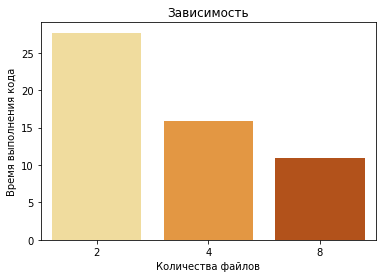

In [69]:
fig, ax = plt.subplots(1, 1)
sns.barplot(x = x, y = y,
           palette = 'YlOrBr', ax = ax)

ax.set(title = 'Зависимость', xlabel = 'Количества файлов', ylabel = 'Время выполнения кода')
plt.show()

In [ ]:
#ну что ж, как и предполагалось, лучше всего считает, где количество файлов = кол-во ядер
#но еще лучше где 8, наверное он берет когда выполнил новый и поэтому экономит время
#забавно)
#линейная зависимость!

8\. Напишите функцию `parallel_map`, которая принимает на вход серию `s` `pd.Series` и функцию одного аргумента `f` и поэлементно применяет эту функцию к серии, распараллелив вычисления при помощи пакета `multiprocessing`. Логика работы функции `parallel_map` должна включать следующие действия:
* разбиение исходной серии на $K$ частей, где $K$ - количество ядер вашего процессора;
* параллельное применение функции `f` к каждой части при помощи метода _серии_ `map` при помощи нескольких подпроцессов;
* объединение результатов работы подпроцессов в одну серию. 

In [ ]:
multiprocessing.cpu_count()

In [ ]:
def parallel_map(s: pd.Series, f: callable) -> pd.Series:
    
    iloc_for_s = np.linspace(0,len(s), 5).astype('int')
    
    list_1_from_4 = s.iloc[:iloc_for_s[1]]
    list_2_from_4 = s.iloc[iloc_for_s[1]:iloc_for_s[2]]
    list_3_from_4 = s.iloc[iloc_for_s[2]:iloc_for_s[3]]
    list_4_from_4 = s.iloc[iloc_for_s[3]:]
    lists = [list_1_from_4, list_2_from_4, list_3_from_4, list_4_from_4]
    
    df = pd.Series()
    
    for lst in lists:
        map_for_lst = lst.map(f)
        df = pd.concat([df, map_for_lst])
    
    #with multiprocessing.Pool(processes = 4) as pool:
        #res = pool.map(map_function, files)
    
    return df

In [ ]:
funct = lambda x: x + 1
a = [1, 2, 3, 4, 5, 6, 7, 8]
parallel_map(pd.Series(a), funct)

In [6]:
%%file iwanttodie2.py

def series_map(tur):
    return tur[0].map(tur[1])

Overwriting iwanttodie2.py


In [7]:
from iwanttodie2 import series_map

In [8]:
def parallel_map(s: pd.Series, f: callable) -> pd.Series:
    
    lists = np.array_split(s, 8)
    
    with multiprocessing.Pool(processes = 4) as pool:
        res = pool.map(series_map, [[lst, f] for lst in lists])
    
    return pd.concat(res)

In [9]:
%%file iwanttodie.py

def map_function(x):
    return x + 1

Overwriting iwanttodie.py


In [10]:
from iwanttodie import map_function

In [14]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
parallel_map(pd.Series(a), map_function)

0    2
1    3
2    4
3    5
4    6
5    7
6    8
7    9
dtype: int64

9\. Напишите функцию `f`, которая принимает на вход тэг и проверяет, удовлетворяет ли тэг следующему шаблону: `[любое число]-[любое слово]-or-less`. Возьмите любой фрагмент файла, полученный в задании 1, примените функцию `f` при помощи `parallel_map` к столбцу `tags` и посчитайте количество тэгов, подходящих под этот шаблон. Решите ту же задачу, воспользовавшись методом _серий_ `map`. Сравните время и результат выполнения двух решений.

In [ ]:
import re

In [1]:
%%file ohmygod.py
import re

def f(tag: str) -> bool:
    pattern = r'\b\d+-[a-zA-Z]+-or-less\b'
    match = re.fullmatch(pattern, str(tag))
    if match:
        return True
    return False

Overwriting ohmygod.py


In [2]:
from ohmygod import f


In [4]:
tags = pd.read_csv('tag_nsteps_1.csv', index_col=0)

In [5]:
tags_for_me = tags.tags

In [21]:
%%timeit

parallel_map(tags_for_me.dropna(), f).sum()

15.6 s ± 1.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
tags_for_me.map(f).sum()

20.6 s ± 502 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


10\. Используя пакет `pandarallel`, примените функцию `f` из задания 9 к столбцу `tags` таблицы, с которой вы работали этом задании. Посчитайте количество тэгов, подходящих под описанный шаблон. Измерьте время выполнения кода. Выведите на экран полученный результат.

In [17]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [19]:
%%timeit
tags_for_me.dropna().parallel_map(f).sum()

12.8 s ± 1.07 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
